# Pit Stops (2011 - 2021)

In [2]:
#0. Import bibliotek
#1. import danych (dodawać te co są potrzebne)
#2. najdłuższy czas i najkrótszy wyjaśnić, że to chodzi z przejazdami
#3. przełożyć te max id i min na górę
#4. zrobić merge z sezonami i pogrupować danę na rok
#5. wykresy
#6. zaznaczyć na wykresach zmiany techniczne o pitstopach i zmiany zasad co do ich wykonywania


#1. Wykresy mediany i średniej
#2. posprawdzać dlaczego z roku na rok były zmiany w czasach (zasady)
#3. pozaznaczać na osi
#4. Pogrupować team'ami
#5. jaki zespół był najlepszy, ułożyć w tabeli w kolejności
#6. Sprawdzić dyskryminację między kierowcami i w jakich zespołach dochodziło

#czy jest dyskryminacja z kierowcami i pitstopami?

In [3]:
#import bibliotek
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pit_stops = pd.read_csv(r"C:\Users\977ma\Desktop\różne\programowanie\f1\pit_stops.csv")
races = pd.read_csv(r"C:\Users\977ma\Desktop\różne\programowanie\f1\races.csv")

In [5]:
pit_stops = pit_stops.rename(columns={'time':'pitTime'})
pit_stops['seconds'] = pit_stops['milliseconds'].apply(lambda x: x/1000)
races.set_index('raceId',inplace=True)

In [6]:
pit_stops.head()

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,seconds
0,841,153,1,1,17:05:23,26.898,26898,26.898
1,841,30,1,1,17:05:52,25.021,25021,25.021
2,841,17,1,11,17:20:48,23.426,23426,23.426
3,841,4,1,12,17:22:34,23.251,23251,23.251
4,841,13,1,13,17:24:10,23.842,23842,23.842


In [7]:
pit_stops.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,8928.0,945.816084,70.202171,841.000,882.000,943.000,1006.00000,1076.000
driverId,8928.0,496.363463,393.980866,1.000,17.000,814.000,828.00000,855.000
stop,8928.0,1.766913,0.922197,1.000,1.000,2.000,2.00000,6.000
lap,8928.0,25.137321,14.485677,1.000,13.000,25.000,36.00000,78.000
milliseconds,8928.0,67331.997088,247452.861126,12897.000,21896.000,23532.000,26064.25000,2077164.000
seconds,8928.0,67.331997,247.452861,12.897,21.896,23.532,26.06425,2077.164


In [8]:
#Najdłuższy i najkrótszy pitstop
display(pit_stops.loc[pit_stops["milliseconds"].idxmax()])
display(pit_stops.loc[pit_stops["milliseconds"].idxmin()])
#napisać, że łącznie z przejazdem przez pitstop

raceId               1061
driverId              849
stop                    1
lap                     2
pitTime          15:08:32
duration        34:37.164
milliseconds      2077164
seconds          2077.164
Name: 8390, dtype: object

raceId               858
driverId             813
stop                   2
lap                   30
pitTime         17:58:49
duration          12.897
milliseconds       12897
seconds           12.897
Name: 1037, dtype: object

In [9]:
pit_stops_m = pd.merge(pit_stops, races, left_on='raceId',right_index=True,how='left')

In [10]:
pit_stops_m.groupby(by='year')['seconds'].median()

year
2011    22.3870
2012    22.2550
2013    22.8840
2014    24.3215
2015    24.2590
2016    24.0930
2017    23.7265
2018    23.6505
2019    23.5220
2020    24.6145
2021    24.2550
2022    24.5270
Name: seconds, dtype: float64

In [11]:
pit_stops_m.groupby(by='year')['seconds'].mean()

year
2011     24.448849
2012     23.283770
2013     24.121319
2014     55.088632
2015     25.500213
2016    124.357194
2017     56.789620
2018     24.674284
2019     24.938538
2020    160.940322
2021    219.750268
2022     23.174323
Name: seconds, dtype: float64

In [12]:
pit_stops_m = pit_stops_m[pit_stops_m['year'] < 2022]

In [13]:
pit_stops_m.groupby(by='year')['seconds'].median()

year
2011    22.3870
2012    22.2550
2013    22.8840
2014    24.3215
2015    24.2590
2016    24.0930
2017    23.7265
2018    23.6505
2019    23.5220
2020    24.6145
2021    24.2550
Name: seconds, dtype: float64

In [14]:
pit_stops_m.groupby(by='year')['seconds'].mean()

year
2011     24.448849
2012     23.283770
2013     24.121319
2014     55.088632
2015     25.500213
2016    124.357194
2017     56.789620
2018     24.674284
2019     24.938538
2020    160.940322
2021    219.750268
Name: seconds, dtype: float64

In [15]:
median = pit_stops_m.groupby(by='year')['seconds'].median()
mean = pit_stops_m.groupby(by='year')['seconds'].mean()

<AxesSubplot:xlabel='year', ylabel='seconds'>

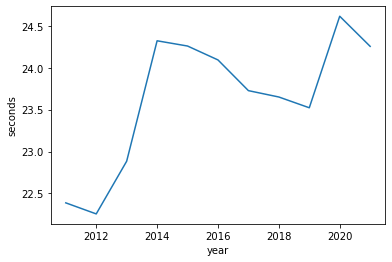

In [18]:
sns.lineplot(data=median)